# 10 - Working with Dates and Time Series Data

https://youtu.be/UFuo7EHI8zc?si=BXHZH4B_hKEq-gGP

[Offset Aliases - Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)


Notes by [Innovinitylabs](https://github.com/innovinitylabs)

In [106]:
import pandas as pd

df = pd.read_csv('data/ETH_1h.csv')

In [107]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


---
---
---

Pandas dateTime method

In [108]:
df.loc[0, 'Date']

'2020-03-13 08-PM'

this wonr work because we are reading date as 'string' 

In [109]:
#df.loc[0, 'Date'].day_name()
# AttributeError: 'str' object has no attribute 'day_name'

so first we have to convert to DateTime using pandas `.to_datetime()`

In [110]:
#df['Date'] = pd.to_datetime(df['Date'])

This wont work either because our dates are not in default format so we have to use `format='  '` and give the proper format

In [111]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %I-%p')

In [112]:
df['Date']

0       2020-03-13 20:00:00
1       2020-03-13 19:00:00
2       2020-03-13 18:00:00
3       2020-03-13 17:00:00
4       2020-03-13 16:00:00
                ...        
23669   2017-07-01 15:00:00
23670   2017-07-01 14:00:00
23671   2017-07-01 13:00:00
23672   2017-07-01 12:00:00
23673   2017-07-01 11:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

now DateTime functions work

In [113]:
df.loc[0, 'Date'].day_name()

'Friday'

---

we can also <mark>parse date at time of loading CSV</mark> with `parse_dates=' '` argument

In [114]:
from datetime import datetime

# d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %I-%p') --> Deprecated

d_parser = lambda x: datetime.strptime(x, '%Y-%m-%d %I-%p')    # --> another way but soon will be deprecated
# dfx = pd.read_csv('data/ETH_1h.csv', parse_dates=['Date'], date_parser=d_parser) # --> futurewarning

dfx = pd.read_csv('data/ETH_1h.csv', parse_dates=['Date'], date_format='%Y-%m-%d %I-%p') # New method
#⬆ so it wont mess with our df

<div class="alert alert-block alert-info">
<b>Tip:</b> We can now directly parse without using a parser function</div>

In [115]:
dfx.head(3)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


---

To run a DateTime methods for entire series

In [116]:
df['Date'].dt.day_name()

0          Friday
1          Friday
2          Friday
3          Friday
4          Friday
           ...   
23669    Saturday
23670    Saturday
23671    Saturday
23672    Saturday
23673    Saturday
Name: Date, Length: 23674, dtype: object

In [117]:
df['DayOfWeek'] = df['Date'].dt.day_name()
df.head(3)

,Date,Symbol,Open,High,Low,Close,Volume,DayOfWeek
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93,Friday
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09,Friday
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81,Friday


In [118]:
df.drop(columns='DayOfWeek', inplace=True)

to get the earliest and latest date we can us `min()` and `max()` method

In [119]:
df['Date'].max()

Timestamp('2020-03-13 20:00:00')

In [120]:
df['Date'].min()

Timestamp('2017-07-01 11:00:00')

In [121]:
df['Date'].max() - df['Date'].min()

Timedelta('986 days 09:00:00')

---
we can use filters too

In [122]:
filt = (df['Date'] >= '2020')
df.loc[filt].head(3)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


All rows in 2019

In [123]:
filt = (df['Date'] >= '2019') & (df['Date'] < '2020')
df.loc[filt]

,Date,Symbol,Open,High,Low,Close,Volume
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99


we are using 'strings' for comparision, we can also use DateTime for the same with `pd.to_datetime('2019-01-01')`

In [124]:
filt = (df['Date'] >= pd.to_datetime('2019-01-01')) & (df['Date'] < pd.to_datetime('2020-01-01'))
df.loc[filt]  # pd.datetime gives error because its a 'string' 

,Date,Symbol,Open,High,Low,Close,Volume
1749,2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
1750,2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
1751,2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69
1752,2019-12-31 20:00:00,ETHUSD,127.84,128.34,127.71,127.86,428183.38
1753,2019-12-31 19:00:00,ETHUSD,128.69,128.69,127.60,127.84,1169847.84
...,...,...,...,...,...,...,...
10504,2019-01-01 04:00:00,ETHUSD,130.75,133.96,130.74,131.96,2791135.37
10505,2019-01-01 03:00:00,ETHUSD,130.06,130.79,130.06,130.75,503732.63
10506,2019-01-01 02:00:00,ETHUSD,130.79,130.88,129.55,130.06,838183.43
10507,2019-01-01 01:00:00,ETHUSD,131.62,131.62,130.77,130.79,434917.99


---
to use date as index

In [125]:
df.set_index('Date').head(3)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [126]:
df.head(1)

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93


In [127]:
df.set_index('Date', inplace=True)

In [128]:
df.head(3)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


Now we can filter the dates by just giving the date

In [129]:
# df['2020']
# wont work now

In [130]:
df.loc['2019'].head(3)

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2019-12-31 23:00:00,ETHUSD,128.33,128.69,128.14,128.54,440678.91
2019-12-31 22:00:00,ETHUSD,128.38,128.69,127.95,128.33,554646.02
2019-12-31 21:00:00,ETHUSD,127.86,128.43,127.72,128.38,350155.69


---

In [131]:
df.sort_index(inplace=True)

sorting index solves key error in next line

---

#### slice  ing

In [132]:
df['2019-06-02' : '2020-03'].head(3) # wont work if index not sorted
# df.loc['2019-06' : '2020-03'] #both works

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2019-06-02 00:00:00,ETHUSD,264.78,268.99,264.11,267.28,763788.60
2019-06-02 01:00:00,ETHUSD,267.28,269.20,266.53,267.68,582283.93
2019-06-02 02:00:00,ETHUSD,267.68,268.23,265.00,266.03,820874.62


to get average closing price of ethereum for all rows for these dates

In [133]:
df['2019-06-02' : '2020-03']['Close'].head(3)

Date
2019-06-02 00:00:00    267.28
2019-06-02 01:00:00    267.68
2019-06-02 02:00:00    266.03
Name: Close, dtype: float64

In [134]:
df['2019-06-02' : '2020-03']['Close'].mean()

198.57806587960937

TO get highs for each day when our data is hourly basis.

In [135]:
df.loc['2019-06-02']['High'].max()

274.75

#### Resampling data

to get the same like weeks and other periods by using `.resample()` method

In [136]:
df['High'].resample('D').max().head(4)

Date
2017-07-01    279.99
2017-07-02    293.73
2017-07-03    285.00
2017-07-04    282.83
Freq: D, Name: High, dtype: float64

we can save it to variable and get max

In [137]:
highs = df['High'].resample('D').max()
highs['2019-06-02']

274.75

this will be useful in case we need to plot them  
we need matplotlib to do that

In [138]:
%matplotlib inline

<Axes: xlabel='Date'>

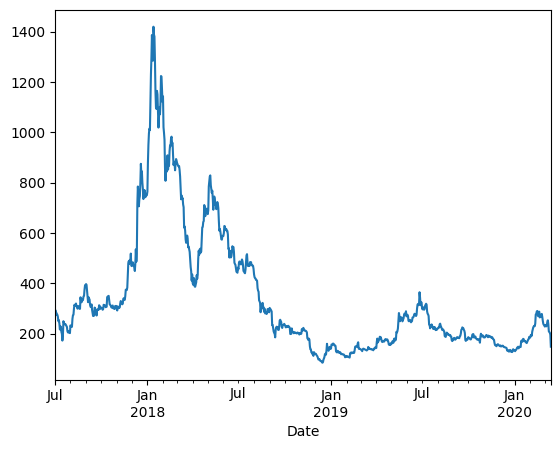

In [139]:
highs.plot()

In [143]:
df.drop(columns='Symbol', inplace=True)

In [144]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-01 11:00:00,279.98,279.99,272.1,275.01,679358.87
2017-07-01 12:00:00,275.01,275.01,271.0,274.83,824362.87
2017-07-01 13:00:00,274.83,274.93,265.0,268.79,3010787.99


To resample multiple columns at once  
ex: resample by day but different 

can do this by resampling entire data frame with `.resample()`

In [146]:
df.resample('W').mean().head(3)
#wont work if the 'DayOfWeek' & 'Symbol' column from earlier is not dropped since they are non-numeric

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-02,268.066486,271.124595,264.819730,268.202162,2.185035e+06
2017-07-09,261.337024,262.872917,259.186190,261.062083,1.337349e+06
2017-07-16,196.193214,199.204405,192.722321,195.698393,2.986756e+06


but  not all columns make sense with mean.  
for high we need max, for low we need min  
so we can resample using `.agg()` method  
also accepts a map of columns and aggregation functions we need to do on those columns

In [148]:
df.resample('W').agg({'Close': 'mean', 'High': 'max', 'Low': 'min', 'Volume': 'sum'}).head(3)

,Close,High,Low,Volume
Date,,,,
2017-07-02,268.202162,293.73,253.23,8.084631e+07
2017-07-09,261.062083,285.00,231.25,2.246746e+08
2017-07-16,195.698393,240.33,130.26,5.017750e+08


---
---
---


![Alt text](image.png)
